In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats

# Machine Learning: Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Machine Learning: Models
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# Machine Learning: Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Model Interpretation
import shap
from lime.lime_tabular import LimeTabularExplainer
from dice_ml import Data, Dice, Model

# Miscellaneous
import time
import dice_ml

<div style="background-color:#ce2029 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">DATA PREPROCESSING</h1></center>
</div> 

In [2]:
df_re = pd.read_csv("ML2_FP_Amenities.csv")
df_re.head()

,Description,province,city,brgy,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),restaurant,...,fire_station,dentist,car_wash,bureau_de_change,internet_cafe,geometry,brgy_area_sqm,brgy_area_ha,city_pop,Price (PHP)
0,Offices at The Galleon - Prime Unit (11G) for ...,Metropolitan Manila,Pasig City,San Antonio,14.588716,121.060009,na,na,82,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.060009 14.588716),816847.128679,81.684713,"803,159","27,448,000"
1,1-Bedroom Unit (21J) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,70,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","26,930,000"
2,1-Bedroom Unit (48D) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,70,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","27,611,000"
3,2-Bedroom Unit (N64I) for Sale in Maven at Cap...,Metropolitan Manila,Pasig City,San Antonio,14.583771,121.059675,2,2,87,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059675 14.583771),816847.128679,81.684713,"803,159","22,595,200"
4,1-Bedroom Unit (31F) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,74,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","26,849,000"


In [3]:
df_condo = df_re[
    ~df_re["Description"].str.contains(
        r"\b(?!p).*house\b|lot|duplex|storey", case=False
    )
]
df_condo.head()

,Description,province,city,brgy,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),restaurant,...,fire_station,dentist,car_wash,bureau_de_change,internet_cafe,geometry,brgy_area_sqm,brgy_area_ha,city_pop,Price (PHP)
0,Offices at The Galleon - Prime Unit (11G) for ...,Metropolitan Manila,Pasig City,San Antonio,14.588716,121.060009,na,na,82,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.060009 14.588716),816847.128679,81.684713,"803,159","27,448,000"
1,1-Bedroom Unit (21J) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,70,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","26,930,000"
2,1-Bedroom Unit (48D) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,70,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","27,611,000"
3,2-Bedroom Unit (N64I) for Sale in Maven at Cap...,Metropolitan Manila,Pasig City,San Antonio,14.583771,121.059675,2,2,87,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059675 14.583771),816847.128679,81.684713,"803,159","22,595,200"
4,1-Bedroom Unit (31F) - Residences at The Galle...,Metropolitan Manila,Pasig City,San Antonio,14.588377,121.059897,1,1,74,34.0,...,NaN,NaN,NaN,NaN,1.0,POINT (121.059897 14.588377),816847.128679,81.684713,"803,159","26,849,000"


In [4]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1015
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Description       997 non-null    object 
 1   province          997 non-null    object 
 2   city              997 non-null    object 
 3   brgy              997 non-null    object 
 4   Latitude          997 non-null    float64
 5   Longitude         997 non-null    float64
 6   Bedrooms          997 non-null    object 
 7   Bath              997 non-null    object 
 8   Floor_area (sqm)  997 non-null    object 
 9   restaurant        948 non-null    float64
 10  school            777 non-null    float64
 11  bank              956 non-null    float64
 12  fast_food         924 non-null    float64
 13  place_of_worship  938 non-null    float64
 14  fuel              612 non-null    float64
 15  pharmacy          947 non-null    float64
 16  cafe              919 non-null    float64
 17  p

In [5]:
df_condo.columns

Index(['Description', 'province', 'city', 'brgy', 'Latitude', 'Longitude',
       'Bedrooms', 'Bath', 'Floor_area (sqm)', 'restaurant', 'school', 'bank',
       'fast_food', 'place_of_worship', 'fuel', 'pharmacy', 'cafe', 'parking',
       'bar', 'townhall', 'police', 'atm', 'community_centre', 'bus_station',
       'clinic', 'shelter', 'toilets', 'hospital', 'post_office', 'bench',
       'public_building', 'college', 'marketplace', 'kindergarten',
       'fire_station', 'dentist', 'car_wash', 'bureau_de_change',
       'internet_cafe', 'geometry', 'brgy_area_sqm', 'brgy_area_ha',
       'city_pop', 'Price (PHP)'],
      dtype='object')

In [6]:
df_condo_clean = df_condo[
    [
        "Latitude",
        "Longitude",
        "Bedrooms",
        "Bath",
        "Floor_area (sqm)",
        "restaurant",
        "school",
        "bank",
        "fast_food",
        "place_of_worship",
        "fuel",
        "pharmacy",
        "cafe",
        "parking",
        "bar",
        "townhall",
        "police",
        "atm",
        "community_centre",
        "bus_station",
        "clinic",
        "shelter",
        "toilets",
        "hospital",
        "post_office",
        "bench",
        "public_building",
        "college",
        "marketplace",
        "kindergarten",
        "fire_station",
        "dentist",
        "car_wash",
        "bureau_de_change",
        "internet_cafe",
        "Price (PHP)",
    ]
].copy()

In [7]:
df_condo_clean.fillna(0, inplace=True)

df_condo_clean["Bedrooms"] = df_condo_clean["Bedrooms"].replace("na", 1)
df_condo_clean["Bath"] = df_condo_clean["Bath"].replace("na", 1)
df_condo_clean["Floor_area (sqm)"] = (df_condo_clean["Floor_area (sqm)"]
                                      .replace("na", np.nan)
                                     )
df_condo_clean["Price (PHP)"] = df_condo_clean["Price (PHP)"].replace(
    "na", np.nan)
df_condo_clean["Price (PHP)"] = df_condo_clean["Price (PHP)"].str.replace(
    ",", "")

# Then, convert the cleaned strings to numeric values
df_condo_clean = df_condo_clean.apply(pd.to_numeric, errors="coerce")
df_condo_clean.dropna(inplace=True)

In [8]:
df_condo_clean['Price (PHP)']

0       27448000.0
1       26930000.0
2       27611000.0
3       22595200.0
4       26849000.0
           ...    
1009     4050000.0
1010     2050000.0
1011     4050000.0
1012    10000000.0
1015    13900000.0
Name: Price (PHP), Length: 949, dtype: float64

In [9]:
df_condo_clean.head()

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),restaurant,school,bank,fast_food,place_of_worship,...,public_building,college,marketplace,kindergarten,fire_station,dentist,car_wash,bureau_de_change,internet_cafe,Price (PHP)
0,14.588716,121.060009,1,1,82.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27448000.0
1,14.588377,121.059897,1,1,70.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26930000.0
2,14.588377,121.059897,1,1,70.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27611000.0
3,14.583771,121.059675,2,2,87.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22595200.0
4,14.588377,121.059897,1,1,74.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26849000.0


In [10]:
df_condo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 1015
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          949 non-null    float64
 1   Longitude         949 non-null    float64
 2   Bedrooms          949 non-null    int64  
 3   Bath              949 non-null    int64  
 4   Floor_area (sqm)  949 non-null    float64
 5   restaurant        949 non-null    float64
 6   school            949 non-null    float64
 7   bank              949 non-null    float64
 8   fast_food         949 non-null    float64
 9   place_of_worship  949 non-null    float64
 10  fuel              949 non-null    float64
 11  pharmacy          949 non-null    float64
 12  cafe              949 non-null    float64
 13  parking           949 non-null    float64
 14  bar               949 non-null    float64
 15  townhall          949 non-null    float64
 16  police            949 non-null    float64
 17  a

In [11]:
df_condo_clean.columns

Index(['Latitude', 'Longitude', 'Bedrooms', 'Bath', 'Floor_area (sqm)',
       'restaurant', 'school', 'bank', 'fast_food', 'place_of_worship', 'fuel',
       'pharmacy', 'cafe', 'parking', 'bar', 'townhall', 'police', 'atm',
       'community_centre', 'bus_station', 'clinic', 'shelter', 'toilets',
       'hospital', 'post_office', 'bench', 'public_building', 'college',
       'marketplace', 'kindergarten', 'fire_station', 'dentist', 'car_wash',
       'bureau_de_change', 'internet_cafe', 'Price (PHP)'],
      dtype='object')

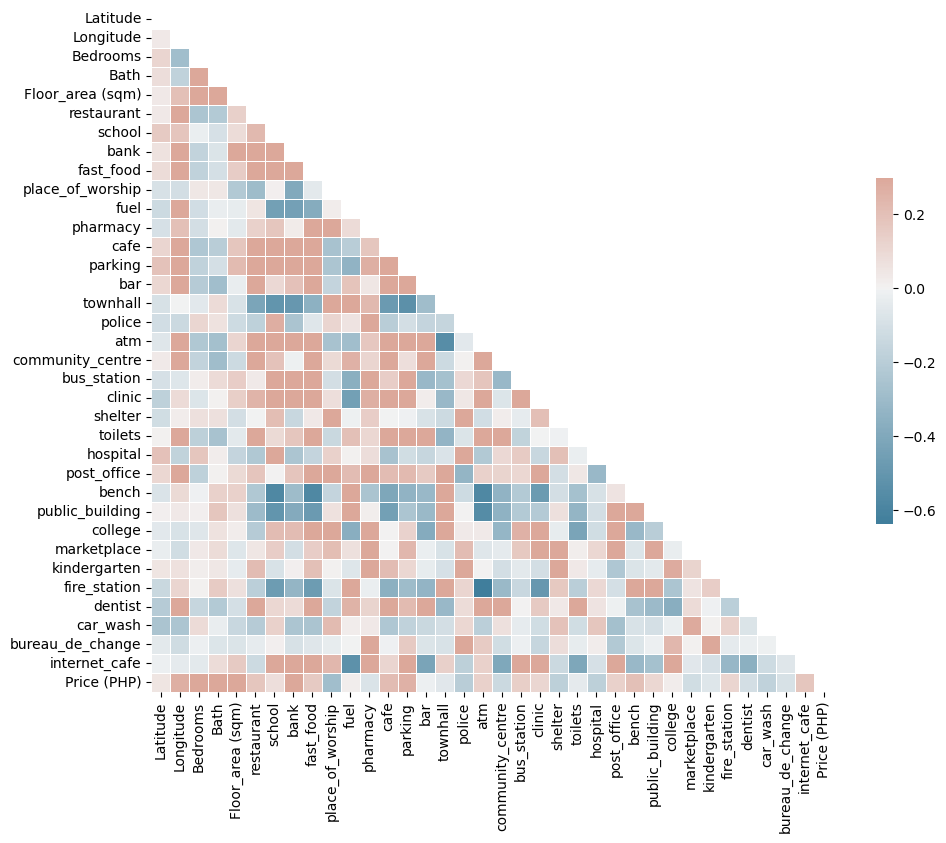

In [12]:
# Calculate the correlation matrix
corr = df_condo_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [13]:
df_condo_agg = df_condo_clean.copy()
df_condo_agg.head()

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),restaurant,school,bank,fast_food,place_of_worship,...,public_building,college,marketplace,kindergarten,fire_station,dentist,car_wash,bureau_de_change,internet_cafe,Price (PHP)
0,14.588716,121.060009,1,1,82.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27448000.0
1,14.588377,121.059897,1,1,70.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26930000.0
2,14.588377,121.059897,1,1,70.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27611000.0
3,14.583771,121.059675,2,2,87.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22595200.0
4,14.588377,121.059897,1,1,74.0,34.0,3.0,60.0,22.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26849000.0


In [14]:
# Combine all amenities into a single feature 'total_amenities'
amenities_columns = ['restaurant', 'school', 'bank', 'fast_food',
                     'place_of_worship', 'fuel', 'pharmacy', 'cafe', 'parking',
                     'bar', 'townhall', 'police', 'atm', 'community_centre',
                     'bus_station', 'clinic', 'shelter', 'toilets', 'hospital',
                     'post_office', 'bench', 'public_building', 'college',
                     'marketplace', 'kindergarten', 'fire_station', 'dentist',
                     'car_wash', 'bureau_de_change', 'internet_cafe'
                     ]

# Combine features into broader categories
df_condo_agg['Food_Count'] = df_condo_agg[['restaurant',
                                           'cafe', 'fast_food', 'bar',
                                           'marketplace']].sum(axis=1)
df_condo_agg['Education_Count'] = df_condo_agg[[
    'school', 'college', 'kindergarten']].sum(axis=1)
df_condo_agg['Healthcare_Count'] = df_condo_agg[[
    'hospital', 'clinic', 'pharmacy', 'dentist']].sum(axis=1)
df_condo_agg['Public_Services_Count'] = df_condo_agg[[
    'police', 'fire_station', 'townhall', 'community_centre',
    'public_building']].sum(axis=1)
df_condo_agg['Finance_Count'] = df_condo_agg[[
    'bank', 'atm', 'bureau_de_change']].sum(axis=1)
df_condo_agg['Transportation_Count'] = df_condo_agg[[
    'bus_station', 'parking']].sum(axis=1)

# Optionally, drop the original columns that were combined
df_condo_agg.drop(columns=amenities_columns, inplace=True)

# Display the first few rows of the modified DataFrame to verify changes
df_condo_agg.head()

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Price (PHP),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
0,14.588716,121.060009,1,1,82.0,27448000.0,71.0,4.0,5.0,0.0,63.0,8.0
1,14.588377,121.059897,1,1,70.0,26930000.0,71.0,4.0,5.0,0.0,63.0,8.0
2,14.588377,121.059897,1,1,70.0,27611000.0,71.0,4.0,5.0,0.0,63.0,8.0
3,14.583771,121.059675,2,2,87.0,22595200.0,71.0,4.0,5.0,0.0,63.0,8.0
4,14.588377,121.059897,1,1,74.0,26849000.0,71.0,4.0,5.0,0.0,63.0,8.0


<div style="background-color:#ce2029 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">Model Training</h1></center>
</div> 

In [15]:
columns_base = ['Bedrooms', 'Bath', 'Floor_area (sqm)', 'Price (PHP)']
df_condo_base = df_condo_agg[columns_base]

In [16]:
X = df_condo_agg.drop('Price (PHP)', axis=1)
y = df_condo_agg['Price (PHP)']

In [17]:
X_base = df_condo_base.drop('Price (PHP)', axis=1)
y_base = df_condo_base['Price (PHP)']

In [18]:
X = df_condo_agg.drop('Price (PHP)', axis=1)
y = df_condo_agg['Price (PHP)']

# Let's categorize 'price' into 'low', 'medium', 'high' using quantiles
price_bins = pd.qcut(df_condo_agg['Price (PHP)'], q=3,
                     labels=['low', 'medium', 'high'])

# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=price_bins,
                                                    test_size=0.2,
                                                    random_state=13)

In [19]:
# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base,
                                                                        y_base,
                                                                        stratify=price_bins,
                                                                        test_size=0.2,
                                                                        random_state=13)

In [20]:
random_state = 13

In [21]:
# Prepare the pipeline
steps = [("scaler", StandardScaler()), ("reg", None)]
pipeline = Pipeline(steps)

# Define parameter ranges (just examples, adjust based on your dataset)
n_neighbor_range = [1, 3, 5, 7, 9]
alpha_range = [0.001, 0.05, 0.5, 1, 10,]
max_depth_range = [1, 3, 5, 7, 10]
learning_rate_range = [0.001,  0.01,  0.1, 0.2, 0.3]
n_estimators_range = [10, 100, 200, 300, 400]

# Define the parameter grid
param_grid = [
    {"reg": [KNeighborsRegressor()], "reg__n_neighbors": n_neighbor_range},
    {"reg": [LinearRegression()]},
    {"reg": [Lasso()], "reg__alpha": alpha_range},
    {"reg": [Ridge()], "reg__alpha": alpha_range},
    {
        "reg": [AdaBoostRegressor(random_state=random_state)],
        "reg__n_estimators": n_estimators_range,
    },
    {
        "reg": [XGBRegressor(objective="reg:squarederror", random_state=random_state)],
        "reg__max_depth": max_depth_range,
        "reg__learning_rate": learning_rate_range,
        "reg__n_estimators": n_estimators_range,
    },
    {
        "reg": [GradientBoostingRegressor(random_state=random_state)],
        "reg__max_depth": max_depth_range,
        "reg__learning_rate": learning_rate_range,
        "reg__n_estimators": n_estimators_range,
    },
    {
        "reg": [RandomForestRegressor(random_state=random_state)],
        "reg__max_depth": max_depth_range,
        "reg__n_estimators": n_estimators_range,
    },
]

In [22]:
# Prepare the pipeline
steps_base = [("scaler", StandardScaler()), ("reg", None)]
pipeline_base = Pipeline(steps_base)

# Define the parameter grid
param_grid_base = [
    {"reg": [KNeighborsRegressor()]},
    {"reg": [LinearRegression()]},
    {"reg": [Lasso()]},
    {"reg": [Ridge()]},
    {
        "reg": [AdaBoostRegressor(random_state=random_state)],
    },
    {
        "reg": [XGBRegressor(objective="reg:squarederror", random_state=random_state)],
    },
    {
        "reg": [GradientBoostingRegressor(random_state=random_state)],
    },
    {
        "reg": [RandomForestRegressor(random_state=random_state)],
    },
]

### W/O Amenities

In [23]:
# Setup GridSearchCV
grid_search_base = GridSearchCV(
    pipeline_base,
    param_grid_base,
    return_train_score=True,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
)

In [24]:
grid_search_base.fit(X_train_base, y_train_base)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..........................reg=KNeighborsRegressor(); total time=   0.0s
[CV] END ..........................reg=KNeighborsRegressor(); total time=   0.0s
[CV] END .............................reg=LinearRegression(); total time=   0.0s
[CV] END ..........................reg=KNeighborsRegressor(); total time=   0.0s
[CV] END ........................................reg=Lasso(); total time=   0.0s
[CV] END ........................................reg=Lasso(); total time=   0.0s
[CV] END ........................................reg=Lasso(); total time=   0.0s
[CV] END .............................reg=LinearRegression(); total time=   0.0s
[CV] END ........................................reg=Lasso(); total time=   0.0s
[CV] END .............................reg=LinearRegression(); total time=   0.0s
[CV] END ........................................reg=Lasso(); total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reg', None)]),
             n_jobs=-1,
             param_grid=[{'reg': [KNeighborsRegressor()]},
                         {'reg': [LinearRegression()]}, {'reg': [Lasso()]},
                         {'reg': [Ridge()]},
                         {'reg': [AdaBoostRegressor(random_state=13)]},
                         {'reg': [XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_b...
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=13, ...)]},
                         {'reg': [GradientBoostingRegressor(random_state=13)]},
                         {'reg': [RandomForestRegressor(random_state=13)]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [25]:
print(f"The best model is: {grid_search_base.best_params_}")
print(f"with an MAE score of: {-grid_search_base.best_score_}")

The best model is: {'reg': RandomForestRegressor(random_state=13)}
with an MAE score of: 1286227.751472438


In [26]:
best_model_base = grid_search_base.best_estimator_
best_model_base.score(X_train_base, y_train_base)

0.98495422197194

In [27]:
best_model_base = grid_search_base.best_estimator_
best_model_base.score(X_test_base, y_test_base)

0.9717927129961356

In [28]:
cv_results_base = pd.DataFrame(grid_search_base.__dict__['cv_results_'])
cv_results_base.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.054083,0.001790,0.003811,0.000115,RandomForestRegressor(random_state=13),{'reg': RandomForestRegressor(random_state=13)},-1.398550e+06,-1.381735e+06,-1.223440e+06,-1.168382e+06,...,-1.286228e+06,89785.973663,1,-8.438123e+05,-8.813285e+05,-8.955400e+05,-9.102998e+05,-8.878492e+05,-8.837659e+05,22188.195732
5,0.013595,0.002255,0.001204,0.000094,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",-1.343292e+06,-1.106848e+06,-1.924672e+06,-1.182582e+06,...,-1.356071e+06,294414.516732,2,-6.775978e+05,-7.128439e+05,-6.969804e+05,-7.251281e+05,-6.893827e+05,-7.003866e+05,16848.406064
6,0.025282,0.001813,0.000923,0.000062,GradientBoostingRegressor(random_state=13),{'reg': GradientBoostingRegressor(random_state...,-1.561057e+06,-1.457437e+06,-1.625567e+06,-1.294496e+06,...,-1.490472e+06,112494.307981,3,-1.076006e+06,-1.146946e+06,-1.046443e+06,-1.098698e+06,-1.081401e+06,-1.089899e+06,33122.310350
0,0.002684,0.000557,0.001363,0.000615,KNeighborsRegressor(),{'reg': KNeighborsRegressor()},-1.868245e+06,-1.213538e+06,-1.745557e+06,-1.908957e+06,...,-1.641638e+06,262941.568051,4,-1.247350e+06,-1.277573e+06,-1.322904e+06,-1.338939e+06,-1.276952e+06,-1.292744e+06,33418.030650
3,0.004666,0.004744,0.000773,0.000321,Ridge(),{'reg': Ridge()},-2.705137e+06,-2.476827e+06,-2.303335e+06,-2.618560e+06,...,-2.570945e+06,163168.040237,5,-2.522735e+06,-2.549345e+06,-2.585127e+06,-2.510954e+06,-2.522991e+06,-2.538230e+06,26605.276791


In [29]:
cv_results_base["param_reg"] = cv_results_base["param_reg"].astype(str)
cv_results_base["params"] = cv_results_base["params"].astype(str)

grouped_results_base = (
    cv_results_base[["mean_train_score",
                     "mean_test_score", "params", 'param_reg']]
    .groupby("param_reg")
    .max()[["mean_train_score", "mean_test_score", "params"]]
)
grouped_results_base

,mean_train_score,mean_test_score,params
param_reg,,,
AdaBoostRegressor(random_state=13),-2.918678e+06,-3.219392e+06,{'reg': AdaBoostRegressor(random_state=13)}
GradientBoostingRegressor(random_state=13),-1.089899e+06,-1.490472e+06,{'reg': GradientBoostingRegressor(random_state...
KNeighborsRegressor(),-1.292744e+06,-1.641638e+06,{'reg': KNeighborsRegressor()}
Lasso(),-2.540133e+06,-2.571898e+06,{'reg': Lasso()}
LinearRegression(),-2.540134e+06,-2.571898e+06,{'reg': LinearRegression()}
RandomForestRegressor(random_state=13),-8.837659e+05,-1.286228e+06,{'reg': RandomForestRegressor(random_state=13)}
Ridge(),-2.538230e+06,-2.570945e+06,{'reg': Ridge()}
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=13, ...)",-7.003866e+05,-1.356071e+06,"{'reg': XGBRegressor(base_score=None, booster=..."


In [30]:
grouped_results2_base = (
    cv_results_base[["std_train_score", "std_test_score", "param_reg"]]
    .groupby("param_reg")
    .max()[["std_train_score", "std_train_score"]]
)
grouped_results2_base

,std_train_score,std_train_score
param_reg,,
AdaBoostRegressor(random_state=13),193863.105548,193863.105548
GradientBoostingRegressor(random_state=13),33122.310350,33122.310350
KNeighborsRegressor(),33418.030650,33418.030650
Lasso(),26265.783011,26265.783011
LinearRegression(),26265.785143,26265.785143
RandomForestRegressor(random_state=13),22188.195732,22188.195732
Ridge(),26605.276791,26605.276791
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=13, ...)",16848.406064,16848.406064


In [31]:
high_index = price_bins[price_bins == "high"].index.tolist()
medium_index = price_bins[price_bins == "medium"].index.tolist()
low_index = price_bins[price_bins == "low"].index.tolist()

df_condo_high_b = df_condo_base.loc[high_index]
df_condo_medium_b = df_condo_base.loc[medium_index]
df_condo_low_b = df_condo_base.loc[low_index]

X_high_b = df_condo_high_b.drop("Price (PHP)", axis=1)
y_high_b = df_condo_high_b["Price (PHP)"]
X_medium_b = df_condo_medium_b.drop("Price (PHP)", axis=1)
y_medium_b = df_condo_medium_b["Price (PHP)"]
X_low_b = df_condo_low_b.drop("Price (PHP)", axis=1)
y_low_b = df_condo_low_b["Price (PHP)"]

# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train_hb, X_test_hb, y_train_hb, y_test_hb = train_test_split(
    X_high_b, y_high_b, test_size=0.2, random_state=13
)

y_pred_hb = best_model_base.predict(X_test_hb)
mae_hb = mean_absolute_error(y_test_hb, y_pred_hb)
mape_hb = mean_absolute_percentage_error(y_test_hb, y_pred_hb)
print(f"MAE for Base - High Price : {mae_hb}")
print(f"MAPE for Base - High Price : {100*mape_hb: .2f}%")
print('---------------------------------------------------------')

X_train_mb, X_test_mb, y_train_mb, y_test_mb = train_test_split(
    X_medium_b, y_medium_b, test_size=0.2, random_state=13
)

y_pred_mb = best_model_base.predict(X_test_mb)
mae_mb = mean_absolute_error(y_test_mb, y_pred_mb)
mape_mb = mean_absolute_percentage_error(y_test_mb, y_pred_mb)
print(f"MAE for Base - Medium Price : {mae_mb}")
print(f"MAPE for Base - Medium Price : {100*mape_mb: .2f}%")
print('---------------------------------------------------------')

X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(
    X_low_b, y_low_b, test_size=0.2, random_state=13
)

y_pred_lb = best_model_base.predict(X_test_lb)
mae_lb = mean_absolute_error(y_test_lb, y_pred_lb)
mape_lb = mean_absolute_percentage_error(y_test_lb, y_pred_lb)
print(f"MAE for Base - Low Price : {mae_lb}")
print(f"MAPE for Base - Low Price : {100*mape_lb: .2f}%")

MAE for Base - High Price : 1124528.1963631925
MAPE for Base - High Price :  3.96%
---------------------------------------------------------
MAE for Base - Medium Price : 756233.0776906966
MAPE for Base - Medium Price :  5.44%
---------------------------------------------------------
MAE for Base - Low Price : 933943.0323951829
MAPE for Base - Low Price :  15.09%


### W/ Amenities

In [32]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    return_train_score=True,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 296 candidates, totalling 1480 fits
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=1; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=1; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=1; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=1; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=1; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=3; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=3; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=3; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=3; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=3; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg__n_neighbors=5; total time=   0.0s
[CV] END ......reg=KNeighborsRegressor(), reg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reg', None)]),
             n_jobs=-1,
             param_grid=[{'reg': [KNeighborsRegressor()],
                          'reg__n_neighbors': [1, 3, 5, 7, 9]},
                         {'reg': [LinearRegression()]},
                         {'reg': [Lasso()],
                          'reg__alpha': [0.001, 0.05, 0.5, 1, 10]},
                         {'reg': [Ridge()],
                          'reg__alpha': [0.001, 0.05, 0.5, 1, 10]},
                         {'reg': [AdaBoostRegressor(random_state=13)]...
                         {'reg': [GradientBoostingRegressor(learning_rate=0.3,
                                                            n_estimators=400,
                                                            random_state=13)],
                          'reg__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                          'reg__max_depth': [1, 3, 5, 7, 10],
                          'reg__n_estimators': [10, 100, 200, 300, 400]},
                         {'reg': [RandomForestRegressor(random_state=13)],
                          'reg__max_depth': [1, 3, 5, 7, 10],
                          'reg__n_estimators': [10, 100, 200, 300, 400]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [34]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 GradientBoostingRegressor(learning_rate=0.3, n_estimators=400,
                                           random_state=13))])

In [35]:
print(f"The best model is: {grid_search.best_params_}")
print(f"with an MAE score of: {-grid_search.best_score_}")

The best model is: {'reg': GradientBoostingRegressor(learning_rate=0.3, n_estimators=400, random_state=13), 'reg__learning_rate': 0.3, 'reg__max_depth': 3, 'reg__n_estimators': 400}
with an MAE score of: 762716.076064916


In [36]:
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])
cv_results.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,param_reg__n_neighbors,param_reg__alpha,param_reg__n_estimators,param_reg__learning_rate,param_reg__max_depth,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
255,0.248822,0.023452,0.002179,0.000661,"GradientBoostingRegressor(learning_rate=0.3, n...",NaN,NaN,400,0.3,3,...,-762716.076065,58879.486947,1,-277876.171106,-286232.322235,-273785.072215,-280127.881659,-266910.135263,-276986.316495,6448.678751
254,0.144332,0.010262,0.002970,0.003378,"GradientBoostingRegressor(learning_rate=0.3, n...",NaN,NaN,300,0.3,3,...,-764308.748531,59213.156662,2,-283558.456171,-293684.091690,-279939.846050,-286637.095178,-273774.078645,-283518.713547,6645.705353
230,0.256819,0.051938,0.002776,0.001794,"GradientBoostingRegressor(learning_rate=0.3, n...",NaN,NaN,400,0.2,3,...,-770214.037155,134377.636309,3,-290301.599389,-304496.015935,-285901.066267,-289497.182166,-277758.393470,-289590.851445,8675.245719
253,0.097677,0.010362,0.001112,0.000025,"GradientBoostingRegressor(learning_rate=0.3, n...",NaN,NaN,200,0.3,3,...,-772881.283582,61091.266587,4,-302017.511331,-322676.710799,-297930.927468,-303915.775153,-296700.894751,-304648.363900,9388.989099
229,0.139691,0.010802,0.002188,0.000797,"GradientBoostingRegressor(learning_rate=0.3, n...",NaN,NaN,300,0.2,3,...,-774790.284505,136085.756335,5,-305142.111161,-324949.798829,-305135.634154,-301382.486474,-295985.779369,-306519.161998,9806.491496


In [37]:
cv_results["param_reg"] = cv_results["param_reg"].astype(str)
cv_results["params"] = cv_results["params"].astype(str)

grouped_results = (
    cv_results[["mean_train_score", "mean_test_score", "params", 'param_reg']]
    .groupby("param_reg")
    .max()[["mean_train_score", "mean_test_score", "params"]]
)
grouped_results

,mean_train_score,mean_test_score,params
param_reg,,,
AdaBoostRegressor(random_state=13),-2.142613e+06,-2.525853e+06,"{'reg': AdaBoostRegressor(random_state=13), 'r..."
"GradientBoostingRegressor(learning_rate=0.3, n_estimators=400, random_state=13)",-2.720930e+05,-7.627161e+05,{'reg': GradientBoostingRegressor(learning_rat...
KNeighborsRegressor(),-3.398996e+05,-1.010460e+06,"{'reg': KNeighborsRegressor(), 'reg__n_neighbo..."
Lasso(),-2.396472e+06,-2.480025e+06,"{'reg': Lasso(), 'reg__alpha': 1}"
LinearRegression(),-2.396478e+06,-2.480032e+06,{'reg': LinearRegression()}
RandomForestRegressor(random_state=13),-5.166342e+05,-8.748209e+05,{'reg': RandomForestRegressor(random_state=13)...
Ridge(),-2.396478e+06,-2.480033e+06,"{'reg': Ridge(), 'reg__alpha': 1}"
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=13, ...)",-2.720938e+05,-8.649767e+05,"{'reg': XGBRegressor(base_score=None, booster=..."


In [38]:
grouped_results2 = (
    cv_results[["std_train_score", "std_test_score", "param_reg"]]
    .groupby("param_reg")
    .max()[["std_train_score", "std_train_score"]]
)
grouped_results2

,std_train_score,std_train_score
param_reg,,
AdaBoostRegressor(random_state=13),135334.608621,135334.608621
"GradientBoostingRegressor(learning_rate=0.3, n_estimators=400, random_state=13)",354877.036433,354877.036433
KNeighborsRegressor(),55882.336622,55882.336622
Lasso(),21731.719765,21731.719765
LinearRegression(),21731.385561,21731.385561
RandomForestRegressor(random_state=13),427994.631192,427994.631192
Ridge(),22670.451410,22670.451410
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=13, ...)",363100.908823,363100.908823


In [39]:
predictions = grid_search.predict(X_test)

In [40]:
best_model = grid_search.best_estimator_

In [41]:
best_model.score(X_train, y_train)

0.9986430859292997

In [42]:
best_model.score(X_test, y_test)

0.9897464497952112

In [43]:
df_condo_high = df_condo_agg.loc[high_index]
df_condo_medium = df_condo_agg.loc[medium_index]
df_condo_low = df_condo_agg.loc[low_index]

X_high = df_condo_high.drop("Price (PHP)", axis=1)
y_high = df_condo_high["Price (PHP)"]
X_medium = df_condo_medium.drop("Price (PHP)", axis=1)
y_medium = df_condo_medium["Price (PHP)"]
X_low = df_condo_low.drop("Price (PHP)", axis=1)
y_low = df_condo_low["Price (PHP)"]

# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_high, y_high, test_size=0.2, random_state=13
)

y_pred_h = best_model.predict(X_test_h)
mae_h = mean_absolute_error(y_test_h, y_pred_h)
mape_h = mean_absolute_percentage_error(y_test_h, y_pred_h)
print(f"MAE for Agg - High Price : {mae_h}")
print(f"MAPE for Agg - High Price : {100*mape_h: .2f}%")
print('---------------------------------------------------------')

# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_medium, y_medium, test_size=0.2, random_state=13
)

y_pred_m = best_model.predict(X_test_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mape_m = mean_absolute_percentage_error(y_test_m, y_pred_m)
print(f"MAE for Agg - Medium Price : {mae_m}")
print(f"MAPE for Agg - Medium Price : {100*mape_m: .2f}%")
print('---------------------------------------------------------')

# Splitting the dataset, stratifying by the categorized 'price_bins'
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_low, y_low, test_size=0.2, random_state=13
)

y_pred_l = best_model.predict(X_test_l)
mae_l = mean_absolute_error(y_test_l, y_pred_l)
mape_l = mean_absolute_percentage_error(y_test_l, y_pred_l)
print(f"MAE for Agg - Low Price : {mae_l}")
print(f"MAPE for Agg - Low Price : {100*mape_l: .2f}%")

MAE for Agg - High Price : 565535.6214324988
MAPE for Agg - High Price :  1.98%
---------------------------------------------------------
MAE for Agg - Medium Price : 273411.9487640771
MAPE for Agg - Medium Price :  1.91%
---------------------------------------------------------
MAE for Agg - Low Price : 261425.41049169132
MAPE for Agg - Low Price :  3.39%


# Bootstrap T-Test

In [44]:
def bootstrap_test_data(X_test, X_test_base, y_test,
                        model_base, model, n_iterations=100, size=None):

    if size is None:
        size = int(0.9 * len(X_test))
    
    differences = []
    for i in range(n_iterations):
        # Resample with replacement
        X_b, _ = resample(X_test_base, y_test, n_samples=size, random_state=i)
        X_, y_ = resample(X_test, y_test, n_samples=size, random_state=i)
        
        score_base = model_base.score(X_b, y_)
        score = model.score(X_, y_)
        
        differences.append(score - score_base)
    return differences

In [45]:
difference_r2 = bootstrap_test_data(X_test, X_test_base, y_test,
                        best_model_base, best_model)

<Axes: ylabel='Frequency'>

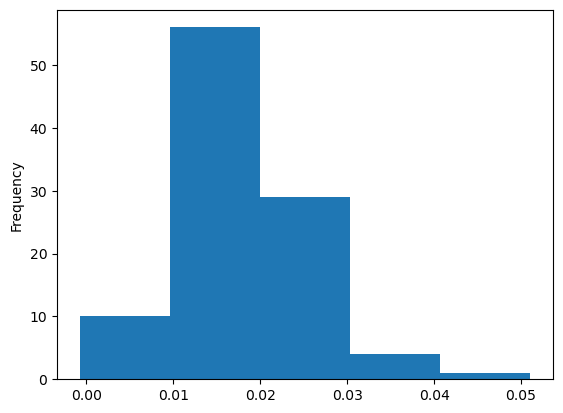

In [46]:
pd.Series(difference_r2).plot(kind='hist',bins=5)

In [47]:
# For instance, testing against no improvement would be 0
popmean = 0

# Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(
    difference_r2, popmean, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in R2.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in R2.")

T-statistic: 22.614798289300957
P-value: 3.4244467985531005e-41
We reject the null hypothesis. There is a significant difference in R2.


<div style="background-color:#ce2029 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">Interpretability</h1></center>
</div> 

In [48]:
df_condo.loc[12].Description

'The Sapphire Bloc Ortigas I 1 Bedroom for sale I for as low as 17k php / month'

In [49]:
df_condo_agg[(df_condo_agg['Price (PHP)'] > 8000000) &
             (df_condo_agg['Price (PHP)'] < 12000000)]

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Price (PHP),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
11,14.583771,121.059675,1,1,46.0,9833600.0,71.0,4.0,5.0,0.0,63.0,8.0
12,14.583771,121.059675,1,1,37.0,8876973.0,71.0,4.0,5.0,0.0,63.0,8.0
17,14.583771,121.059675,1,1,51.0,10976000.0,71.0,4.0,5.0,0.0,63.0,8.0
19,14.583771,121.059675,1,1,52.0,11300800.0,71.0,4.0,5.0,0.0,63.0,8.0
28,14.583771,121.059675,1,1,46.0,10752000.0,71.0,4.0,5.0,0.0,63.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.537470,120.999797,1,1,40.0,8625062.0,2.0,0.0,3.0,0.0,2.0,0.0
998,14.499387,121.025633,2,1,58.0,11600000.0,13.0,4.0,7.0,2.0,3.0,3.0
1000,14.499387,121.025633,2,1,58.0,11600000.0,13.0,4.0,7.0,2.0,3.0,3.0
1005,14.499387,121.025633,2,1,58.0,11700000.0,13.0,4.0,7.0,2.0,3.0,3.0


In [50]:
df_condo.loc[13]

Description         Offices at The Galleon - Prime Unit (27I) for ...
province                                          Metropolitan Manila
city                                                       Pasig City
brgy                                                      San Antonio
Latitude                                                    14.588716
Longitude                                                  121.060009
Bedrooms                                                           na
Bath                                                               na
Floor_area (sqm)                                                   93
restaurant                                                       34.0
school                                                            3.0
bank                                                             60.0
fast_food                                                        22.0
place_of_worship                                                  1.0
fuel                

<div style="background-color:#FC6A03 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">LIME</h2></center>
</div>  

In [51]:
best_model = grid_search.best_estimator_

In [52]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 GradientBoostingRegressor(learning_rate=0.3, n_estimators=400,
                                           random_state=13))])

In [53]:
lime_explainer = LimeTabularExplainer(
    X.values, feature_names=X.columns, mode='regression')

lime_explanation = lime_explainer.explain_instance(
    X.iloc[0].values, best_model.predict)

lime_explanation.show_in_notebook()

X does not have valid feature names, but StandardScaler was fitted with feature names


<div style="background-color:#FC6A03 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">SHAP</h2></center>
</div>  

In [54]:
shap_explainer = shap.Explainer(best_model.predict, X, feature_names=X.columns.tolist())
shap_values = shap_explainer(X)
shap_explanation = shap.Explanation(
    shap_values[0],
    base_values=shap_values[0].base_values,
    data=shap_values[0].data,
    feature_names=X.columns.tolist()
)

PermutationExplainer explainer: 950it [01:34,  9.13it/s]                         


In [55]:
df_condo_agg[(df_condo_agg['Price (PHP)']>8000000)&(df_condo_agg['Price (PHP)']<12000000)]

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Price (PHP),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
11,14.583771,121.059675,1,1,46.0,9833600.0,71.0,4.0,5.0,0.0,63.0,8.0
12,14.583771,121.059675,1,1,37.0,8876973.0,71.0,4.0,5.0,0.0,63.0,8.0
17,14.583771,121.059675,1,1,51.0,10976000.0,71.0,4.0,5.0,0.0,63.0,8.0
19,14.583771,121.059675,1,1,52.0,11300800.0,71.0,4.0,5.0,0.0,63.0,8.0
28,14.583771,121.059675,1,1,46.0,10752000.0,71.0,4.0,5.0,0.0,63.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.537470,120.999797,1,1,40.0,8625062.0,2.0,0.0,3.0,0.0,2.0,0.0
998,14.499387,121.025633,2,1,58.0,11600000.0,13.0,4.0,7.0,2.0,3.0,3.0
1000,14.499387,121.025633,2,1,58.0,11600000.0,13.0,4.0,7.0,2.0,3.0,3.0
1005,14.499387,121.025633,2,1,58.0,11700000.0,13.0,4.0,7.0,2.0,3.0,3.0


In [56]:
df_condo_agg.loc[12]

Latitude                 1.458377e+01
Longitude                1.210597e+02
Bedrooms                 1.000000e+00
Bath                     1.000000e+00
Floor_area (sqm)         3.700000e+01
Price (PHP)              8.876973e+06
Food_Count               7.100000e+01
Education_Count          4.000000e+00
Healthcare_Count         5.000000e+00
Public_Services_Count    0.000000e+00
Finance_Count            6.300000e+01
Transportation_Count     8.000000e+00
Name: 12, dtype: float64

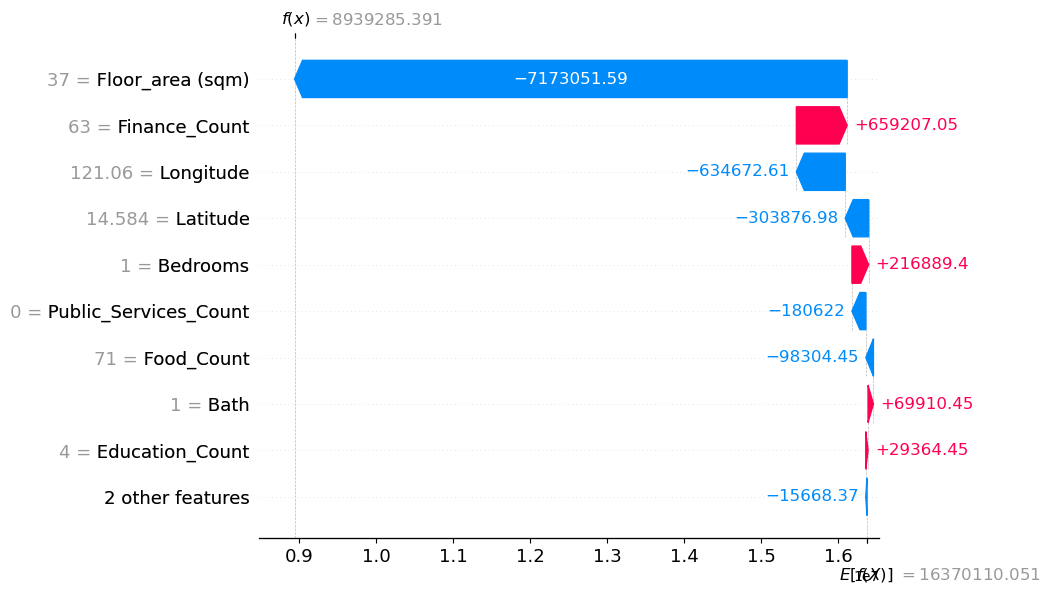

In [57]:
shap.plots.waterfall(shap_values[12])

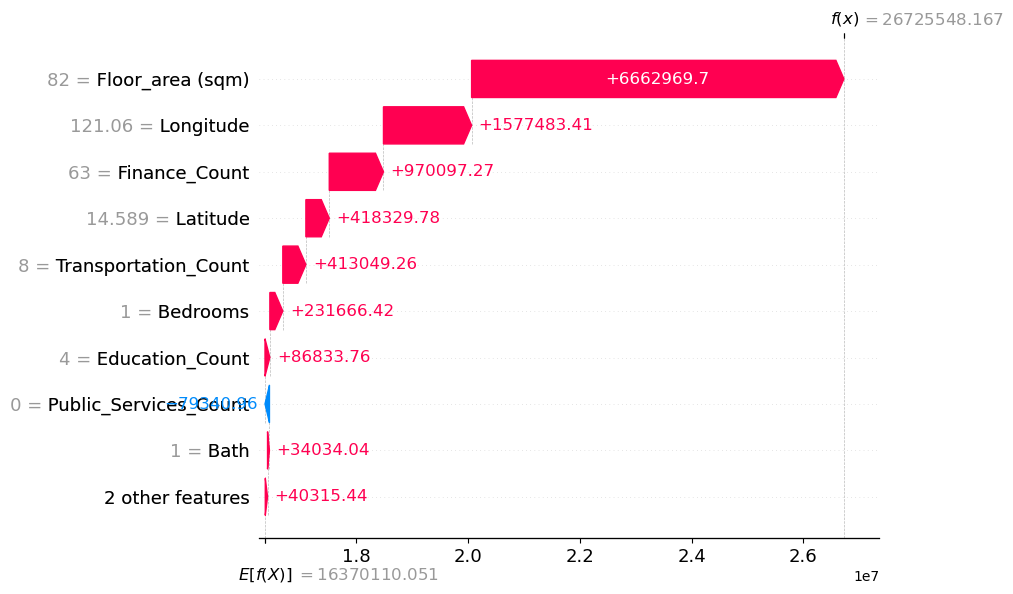

In [58]:
shap.plots.waterfall(shap_values[0])

In [59]:
df_condo_agg.columns

Index(['Latitude', 'Longitude', 'Bedrooms', 'Bath', 'Floor_area (sqm)',
       'Price (PHP)', 'Food_Count', 'Education_Count', 'Healthcare_Count',
       'Public_Services_Count', 'Finance_Count', 'Transportation_Count'],
      dtype='object')

In [60]:
shap_values_mean = np.abs(shap_values.values).mean(axis=0).tolist()

In [61]:
shap_values_mean

[502086.5987814819,
 1789940.7220299828,
 425671.07414309256,
 198969.70202667464,
 7216650.659351454,
 188287.79856746143,
 80469.61750930849,
 71933.67358502638,
 89782.14149791813,
 727198.6604589872,
 143780.3359411923]

<BarContainer object of 11 artists>

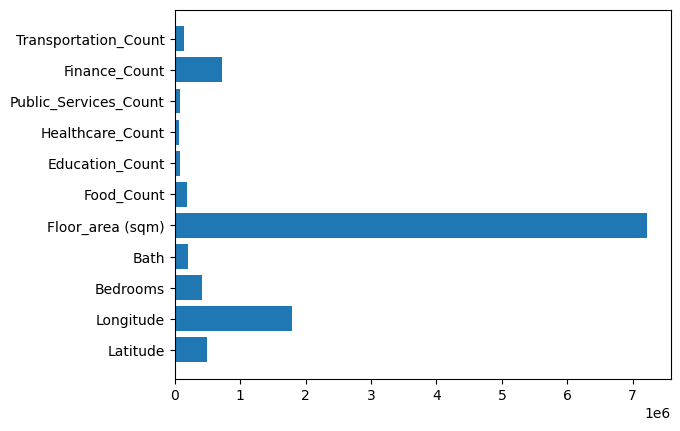

In [62]:
plt.barh(df_condo_agg.drop('Price (PHP)',axis=1).columns, shap_values_mean,)

In [63]:
# Assuming `columns` are your features and `shap_values_mean` are the corresponding values
columns = df_condo_agg.drop('Price (PHP)', axis=1).columns

# Pair columns with their corresponding SHAP values
paired = list(zip(columns, shap_values_mean))

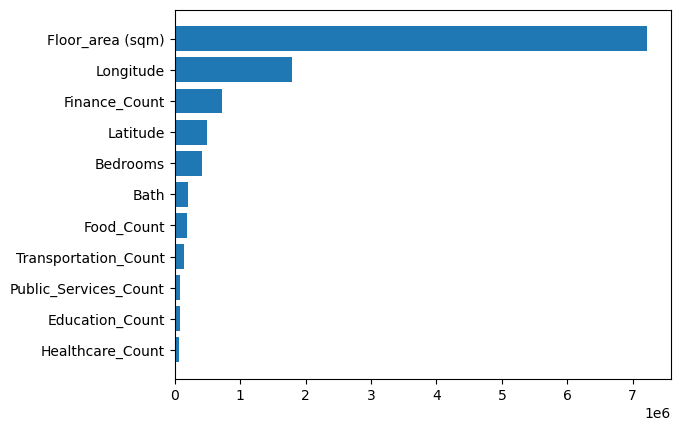

In [64]:
# Sort the pairs based on SHAP values (ascending order)
sorted_pairs = sorted(paired, key=lambda x: x[1])

# Unzip the pairs back into two lists
sorted_columns, sorted_shap_values = zip(*sorted_pairs)

# Plot
plt.barh(sorted_columns, sorted_shap_values)
plt.show()

In [65]:
sorted_columns

('Healthcare_Count',
 'Education_Count',
 'Public_Services_Count',
 'Transportation_Count',
 'Food_Count',
 'Bath',
 'Bedrooms',
 'Latitude',
 'Finance_Count',
 'Longitude',
 'Floor_area (sqm)')

In [66]:
sorted_shap_values

(71933.67358502638,
 80469.61750930849,
 89782.14149791813,
 143780.3359411923,
 188287.79856746143,
 198969.70202667464,
 425671.07414309256,
 502086.5987814819,
 727198.6604589872,
 1789940.7220299828,
 7216650.659351454)

In [67]:
pd.DataFrame({'Features':sorted_columns, 'SHAP_values':sorted_shap_values})

,Features,SHAP_values
0,Healthcare_Count,7.193367e+04
1,Education_Count,8.046962e+04
2,Public_Services_Count,8.978214e+04
3,Transportation_Count,1.437803e+05
4,Food_Count,1.882878e+05
5,Bath,1.989697e+05
6,Bedrooms,4.256711e+05
7,Latitude,5.020866e+05
8,Finance_Count,7.271987e+05
9,Longitude,1.789941e+06


In [68]:
shap_values.values[0]

array([ 418329.77929567, 1577483.41195404,  231666.42462669,
         34034.03986881, 6662969.69632472,   20978.43106447,
         86833.762018  ,   19337.00871407,  -79340.96033702,
        970097.26708317,  413049.25536606])

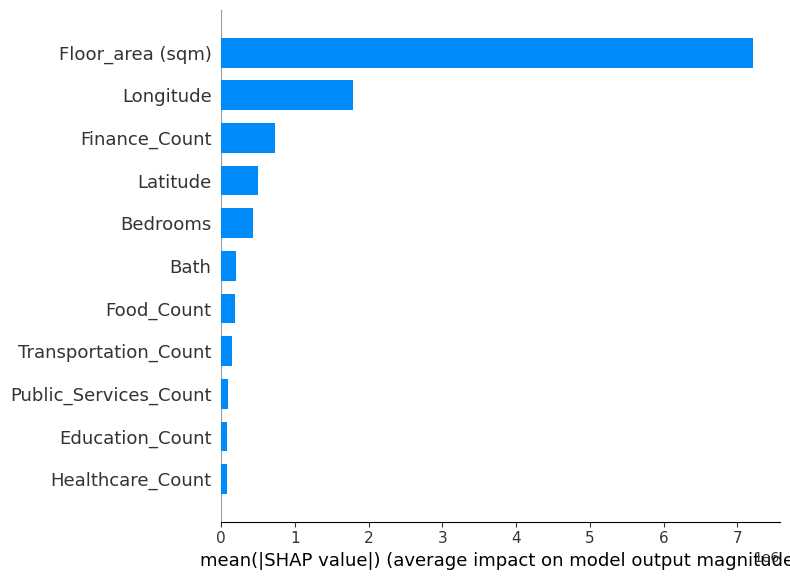

In [69]:
shap.summary_plot(shap_values, X, plot_type="bar")

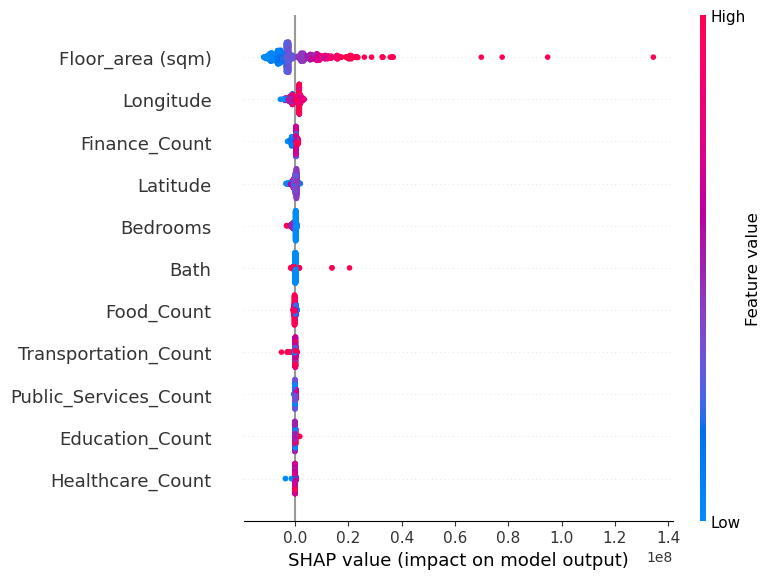

In [70]:
shap.summary_plot(shap_values, X)

<div style="background-color:#FC6A03 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">COUNTERFACTUALS</h2></center>
</div>  

In [71]:
data_description = df_condo_agg.describe().T

In [72]:
data_description

,count,mean,std,min,25%,50%,75%,max
Latitude,949.0,1.458331e+01,3.727981e-02,1.441798e+01,1.457826e+01,1.458838e+01,1.458888e+01,1.470500e+01
Longitude,949.0,1.210592e+02,2.221754e-02,1.209852e+02,1.210533e+02,1.210600e+02,1.210790e+02,1.210937e+02
Bedrooms,949.0,1.363541e+00,6.037667e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Bath,949.0,1.210748e+00,4.475088e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Floor_area (sqm),949.0,6.383667e+01,3.137691e+01,1.700000e+01,4.400000e+01,5.700000e+01,7.500000e+01,4.090000e+02
Price (PHP),949.0,1.777306e+07,1.293712e+07,1.833376e+06,9.206000e+06,1.549200e+07,2.446100e+07,1.752650e+08
Food_Count,949.0,6.751001e+01,4.353055e+01,0.000000e+00,2.900000e+01,7.100000e+01,1.220000e+02,3.280000e+02
Education_Count,949.0,2.368809e+00,1.619018e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01
Healthcare_Count,949.0,4.665964e+00,2.526883e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,2.300000e+01
Public_Services_Count,949.0,2.163330e+00,2.175255e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00


In [73]:
feature_names = data_description.drop('Price (PHP)').index.tolist()

In [74]:
features = {}
for feat in data_description.drop('Price (PHP)').index:
    features[feat] = [data_description.loc[feat, 'min'],
                      data_description.loc[feat, 'max']]

In [75]:
dice_model = Model(model=best_model, backend='sklearn',
                  model_type='regressor')
dice_data = Data(
    features=features,
    continuous_features=feature_names,
    outcome_name='Price (PHP)')
dice_explainer = Dice(dice_data, dice_model)

In [76]:
dice_explanation = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1010].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[10_000_000.0, 11_000_000.0],
    # features_to_vary='all'
)
dice_explanation.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 17.97it/s]

Query instance (original outcome : 2059812.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.704999,120.98518,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,2059812.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [10000000.0, 11000000.0]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,134.0,-,-,-,-,-,18.0,-
1,14.0,-,-,-,67.0,-,-,-,-,-,-,-
2,-,-,-,-,120.0,-,-,-,1.0,-,19.0,-
3,-,-,2.0,-,89.0,72.0,-,-,-,-,-,-
4,-,-,-,-,71.0,171.0,6.0,-,-,-,-,-
5,14.0,-,-,-,115.0,-,-,-,-,-,19.0,-
6,-,-,-,-,120.0,-,-,-,-,-,19.0,-
7,-,-,-,-,102.0,4.0,2.0,-,-,-,-,-
8,14.0,-,-,-,89.0,-,-,6.0,-,-,22.0,-
9,-,-,-,-,54.0,-,-,-,1.0,75.0,-,-


In [77]:
dice_explanation = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1015].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[20_000_000.0, 22_500_000.0],
    # features_to_vary='all'
)
dice_explanation.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 29.26it/s]

Query instance (original outcome : 13892546.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.54595,121.0494,1.0,1.0,43.0,328.0,8.0,11.0,2.0,101.0,12.0,13892546.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [20000000.0, 22500000.0]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,72.0,-,-,-,-,-,-,-
1,-,-,-,-,80.0,-,-,-,-,-,-,-
2,-,-,-,-,69.0,-,-,-,-,-,-,-
3,-,-,-,-,81.0,-,-,-,-,-,-,-
4,-,-,-,-,72.0,-,-,-,-,-,6.0,-
5,-,-,2.0,-,77.0,-,-,-,-,-,-,-
6,-,-,-,-,80.0,-,-,-,-,21.0,-,-
7,14.0,-,-,-,87.0,-,-,-,-,-,-,-
8,-,-,-,-,79.0,-,-,-,-,-,-,-
9,-,-,-,-,80.0,-,4.0,-,-,-,-,-


In [78]:
dice_explanation = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1015].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[5_000_000.0, 7_500_000.0],
    # features_to_vary='all'
)
dice_explanation.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 33.85it/s]

Query instance (original outcome : 13892546.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.54595,121.0494,1.0,1.0,43.0,328.0,8.0,11.0,2.0,101.0,12.0,13892546.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [5000000.0, 7500000.0]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,28.0,-,-,-,-,-,-,-
1,-,-,-,4.0,-,-,-,-,-,-,27.0,-
2,14.0,-,-,-,-,-,-,-,-,-,18.0,-
3,14.0,-,-,-,-,-,-,-,-,-,24.0,-
4,-,-,-,-,17.0,-,-,-,-,-,-,-
5,-,-,-,3.0,-,-,-,-,-,-,19.0,-
6,-,-,-,2.0,-,-,-,-,-,-,22.0,-
7,-,-,4.0,-,-,-,-,-,-,-,29.0,-
8,-,-,-,-,19.0,173.0,-,-,-,-,-,-
9,-,-,2.0,-,25.0,-,-,-,-,-,-,-


In [79]:
pd.DataFrame(df_condo_agg.loc[1010].drop('Price (PHP)')).T

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
1010,14.704999,120.98518,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
dice_explanation_fa = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1010].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[2_500_000, 3_000_000],
    features_to_vary=['Food_Count',
                      'Education_Count',
                      'Healthcare_Count',
                      'Public_Services_Count',
                      'Finance_Count',
                      'Transportation_Count']
)
dice_explanation_fa.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 18.66it/s]

Query instance (original outcome : 2059812.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.704999,120.98518,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,2059812.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [2500000, 3000000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,-,-,8.0,-,-,-,7.0,-
1,-,-,-,-,-,262.0,-,12.0,-,-,-,-
2,-,-,-,-,-,-,-,-,6.0,56.0,-,-
3,-,-,-,-,-,-,4.0,16.0,-,-,-,-
4,-,-,-,-,-,-,-,-,4.0,65.0,-,-
5,-,-,-,-,-,242.0,-,-,-,82.0,-,-
6,-,-,-,-,-,-,-,-,-,86.0,24.0,-
7,-,-,-,-,-,4.0,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,7.0,56.0,-,-
9,-,-,-,-,-,284.0,-,-,-,49.0,-,-


In [81]:
dice_explanation_fa = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1010].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[2_500_000, 3_000_000],
    features_to_vary=['Food_Count',
                      'Education_Count',
                      'Healthcare_Count',
                      'Public_Services_Count',
                      'Finance_Count',
                      'Transportation_Count']
)
dice_explanation_fa.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 35.11it/s]

Query instance (original outcome : 2059812.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.704999,120.98518,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,2059812.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [2500000, 3000000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,-,-,-,-,-,55.0,19.0,-
1,-,-,-,-,-,303.0,-,-,-,50.0,-,-
2,-,-,-,-,-,-,7.0,-,-,-,11.0,-
3,-,-,-,-,-,-,7.0,16.0,-,-,-,-
4,-,-,-,-,-,320.0,-,-,-,59.0,-,-
5,-,-,-,-,-,-,5.0,17.0,-,-,-,-
6,-,-,-,-,-,42.0,5.0,-,-,-,-,-
7,-,-,-,-,-,294.0,-,-,-,75.0,-,-
8,-,-,-,-,-,-,10.0,-,-,-,6.0,-
9,-,-,-,-,-,31.0,-,-,3.0,-,-,-


In [82]:
dice_explanation_fa = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[12].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[9_500_000, 10_000_000],
    features_to_vary=['Food_Count',
                      'Education_Count',
                      'Healthcare_Count',
                      'Public_Services_Count',
                      'Finance_Count',
                      'Transportation_Count']
)
dice_explanation_fa.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 35.37it/s]

Query instance (original outcome : 8764214.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.583771,121.059675,1.0,1.0,37.0,71.0,4.0,5.0,0.0,63.0,8.0,8764214.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [9500000, 10000000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,-,213.0,10.0,-,-,-,-,-
1,-,-,-,-,-,-,8.0,-,-,31.0,-,-
2,-,-,-,-,-,-,9.0,-,-,-,3.0,-
3,-,-,-,-,-,-,-,11.0,6.0,-,-,-
4,-,-,-,-,-,201.0,10.0,-,-,-,-,-
5,-,-,-,-,-,-,8.0,19.0,-,-,-,-
6,-,-,-,-,-,-,9.0,18.0,-,-,-,-
7,-,-,-,-,-,22.0,6.0,-,-,-,-,-
8,-,-,-,-,-,-,5.0,-,6.0,-,-,-
9,-,-,-,-,-,-,8.0,-,-,-,-,-


In [83]:
dice_explanation_fa = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[12].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[9_500_000, 10_000_000],
    features_to_vary=['Food_Count',
                      'Education_Count',
                      'Healthcare_Count',
                      'Public_Services_Count',
                      'Finance_Count',
                      'Transportation_Count']
)
dice_explanation_fa.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

Query instance (original outcome : 8764214.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.583771,121.059675,1.0,1.0,37.0,71.0,4.0,5.0,0.0,63.0,8.0,8764214.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [9500000, 10000000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,-,177.0,10.0,-,-,-,-,-
1,-,-,-,-,-,-,9.0,1.0,-,-,-,-
2,-,-,-,-,-,-,7.0,10.0,-,-,-,-
3,-,-,-,-,-,-,8.0,6.0,-,-,-,-
4,-,-,-,-,-,-,9.0,-,-,70.0,-,-
5,-,-,-,-,-,-,8.0,-,-,54.0,-,-
6,-,-,-,-,-,-,9.0,11.0,-,-,-,-
7,-,-,-,-,-,265.0,-,-,5.0,-,-,-
8,-,-,-,-,-,-,7.0,-,2.0,-,-,-
9,-,-,-,-,-,-,10.0,-,-,55.0,-,-


In [84]:
dice_explanation_fa = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[12].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[9_500_000, 10_000_000],
    features_to_vary=['Food_Count',
                      'Education_Count',
                      'Healthcare_Count',
                      'Public_Services_Count',
                      'Finance_Count',
                      'Transportation_Count']
)
dice_explanation_fa.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 35.23it/s]

Query instance (original outcome : 8764214.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.583771,121.059675,1.0,1.0,37.0,71.0,4.0,5.0,0.0,63.0,8.0,8764214.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [9500000, 10000000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,-,-,-,-,9.0,-,-,101.0,-,-
1,-,-,-,-,-,4.0,-,-,6.0,-,-,-
2,-,-,-,-,-,228.0,-,-,7.0,-,-,-
3,-,-,-,-,-,50.0,-,-,4.0,-,-,-
4,-,-,-,-,-,136.0,9.0,-,-,-,-,-
5,-,-,-,-,-,326.0,-,-,3.0,-,-,-
6,-,-,-,-,-,-,9.0,-,-,93.0,-,-
7,-,-,-,-,-,-,-,23.0,7.0,-,-,-
8,-,-,-,-,-,298.0,-,-,5.0,-,-,-
9,-,-,-,-,-,-,10.0,1.0,-,-,-,-


In [85]:
dice_explanation = dice_explainer.generate_counterfactuals(
    pd.DataFrame(df_condo_agg.loc[1010].drop('Price (PHP)')).T,
    total_CFs=10,
    desired_range=[2_500_000, 9_500_000]
)
dice_explanation.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 34.04it/s]

Query instance (original outcome : 2059812.0)


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,14.704999,120.98518,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,2059812.0



Diverse Counterfactual set without sparsity correction since only metadata about each  feature is available (new outcome: [2500000, 9500000]


,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
0,-,-,2.0,-,-,-,-,-,-,37.0,-,-
1,-,-,-,2.0,-,-,-,-,-,54.0,-,-
2,-,-,3.0,-,-,-,-,-,-,46.0,-,-
3,-,-,-,-,-,283.0,-,20.0,-,-,-,-
4,-,-,-,-,-,-,-,-,-,31.0,-,-
5,-,-,-,-,-,-,1.0,-,-,97.0,-,-
6,-,-,-,-,-,-,-,-,-,80.0,-,-
7,-,-,-,-,-,-,9.0,-,-,-,8.0,-
8,-,-,-,-,-,-,-,-,-,66.0,-,-
9,-,-,-,-,-,-,6.0,-,-,30.0,-,-


<div style="background-color:#FC6A03 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Prototype - Model Deployment</h2></center>
</div>  

In [86]:
feature_df = pd.read_csv('feature_df.csv')

In [87]:
feature_df[feature_df['city']=='Quezon City']['brgy'].unique()

array(['Alicia', 'Amihan', 'Apolonio Samson', 'Aurora', 'Baesa', 'Bagbag',
       'Bagong Lipunan Ng Crame', 'Bagong Pag-Asa', 'Bagong Silangan',
       'Bagumbayan', 'Bagumbuhay', 'Bahay Toro', 'Balingasa',
       'Balong Bato', 'Batasan Hills', 'Bayanihan', 'Blue Ridge A',
       'Blue Ridge B', 'Botocan', 'Bungad', 'Camp Aguinaldo', 'Capri',
       'Central', 'Claro', 'Commonwealth', 'Constitution Hills', 'Culiat',
       'Damar', 'Damayan', 'Damayang Lagi', 'Del Monte', 'Dioquino Zobel',
       'Doña Imelda', 'Doña Josefa', 'Don Manuel', 'Duyan-Duyan',
       'East Kamias', 'E. Rodriguez', 'Escopa I', 'Escopa II',
       'Escopa III', 'Escopa IV', 'Fairview', 'Gulod', 'Holy Spirit',
       'Horseshoe', 'Immaculate Concepcion', 'Kaligayahan', 'Kalusugan',
       'Kamuning', 'Katipunan', 'Kaunlaran', 'Kristong Hari',
       'Krus Na Ligas', 'Laging Handa', 'Libis', 'Lourdes',
       'Loyola Heights', 'Maharlika', 'Malaya', 'Mangga', 'Manresa',
       'Mariana', 'Mariblo', 'Marilag', 

In [88]:
def get_features(bedrooms, bath, fa, barangay, city):
    feature_df = pd.read_csv('feature_df.csv')
    filtered_df = feature_df.query(
        f"`brgy`=='{barangay}' & `city`=='{city}'").copy()
    filtered_df['Bedrooms'] = bedrooms
    filtered_df['Bath'] = bath
    filtered_df['Floor_area (sqm)'] = fa
    filtered_df["city_pop"] = filtered_df["city_pop"].str.replace(",", "")
    filtered_df = filtered_df.apply(pd.to_numeric, errors="coerce")

    final_columns = [
        'Latitude', 'Longitude', 'Bedrooms', 'Bath',
        'Floor_area (sqm)', 'Food_Count', 'Education_Count',
        'Healthcare_Count', 'Public_Services_Count', 'Finance_Count',
        'Transportation_Count',
    ]

    return filtered_df[final_columns]

In [89]:
def get_price(sample_1, model):
    sample_1['Price (PHP)'] = (model.predict(sample_1))[0]*1.4
    return sample_1

In [90]:
sample_1 = get_features(1, 1, 30, 'Alabang', 'Muntinlupa')

In [91]:
sample_1

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
1199,14.418699,121.040454,1,1,30,109.0,2.0,23.0,4.0,27.0,14.0


In [92]:
get_price(sample_1, best_model)

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
1199,14.418699,121.040454,1,1,30,109.0,2.0,23.0,4.0,27.0,14.0,3.072186e+06


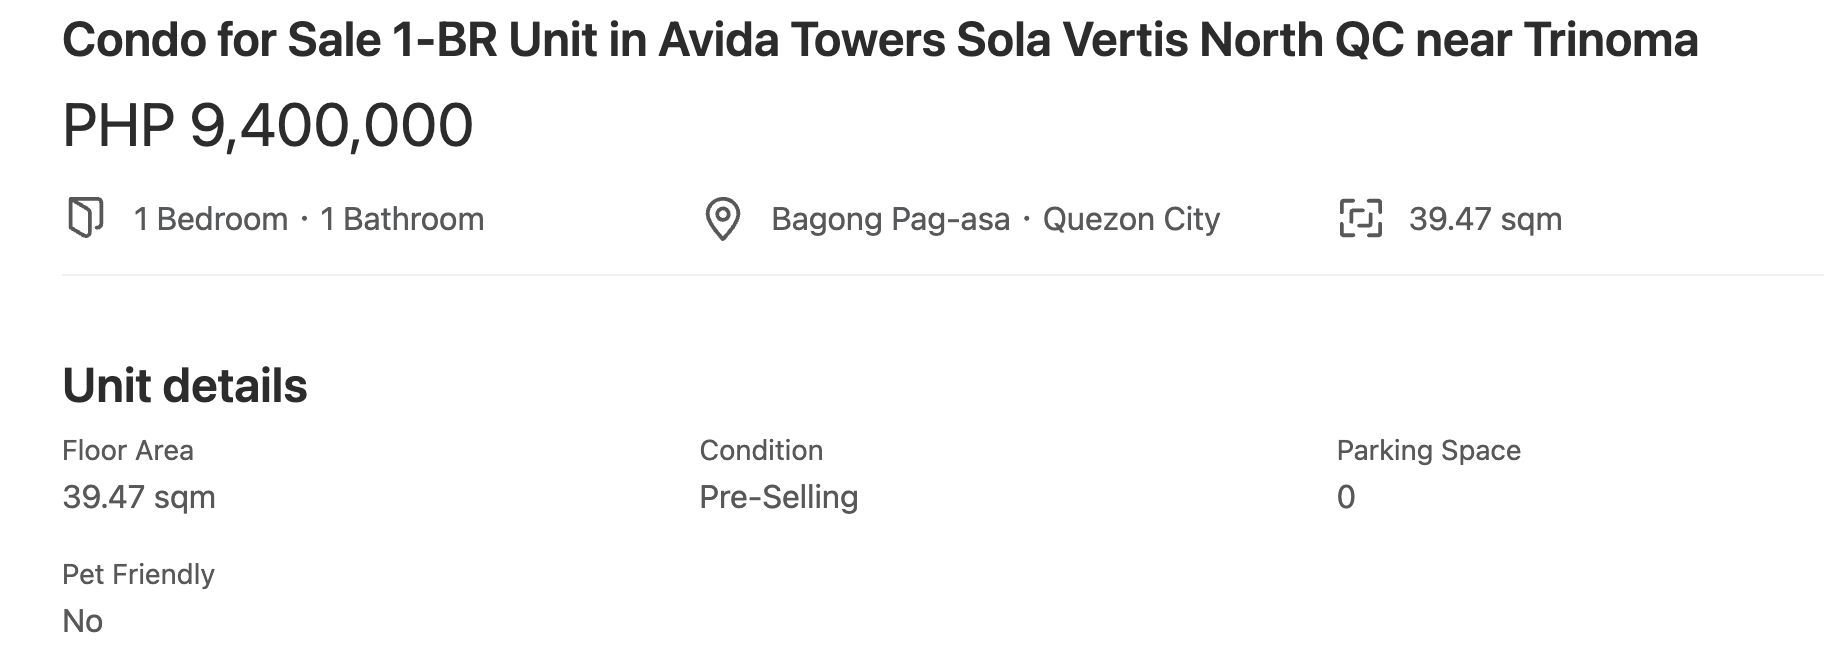

In [93]:
sample_2 = get_features(1, 1, 39.47, 'Bagong Pag-Asa', 'Quezon City')

In [94]:
get_price(sample_2, best_model)

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
1487,14.658809,121.032173,1,1,39.47,4.0,2.0,4.0,1.0,3.0,0.0,9.659634e+06


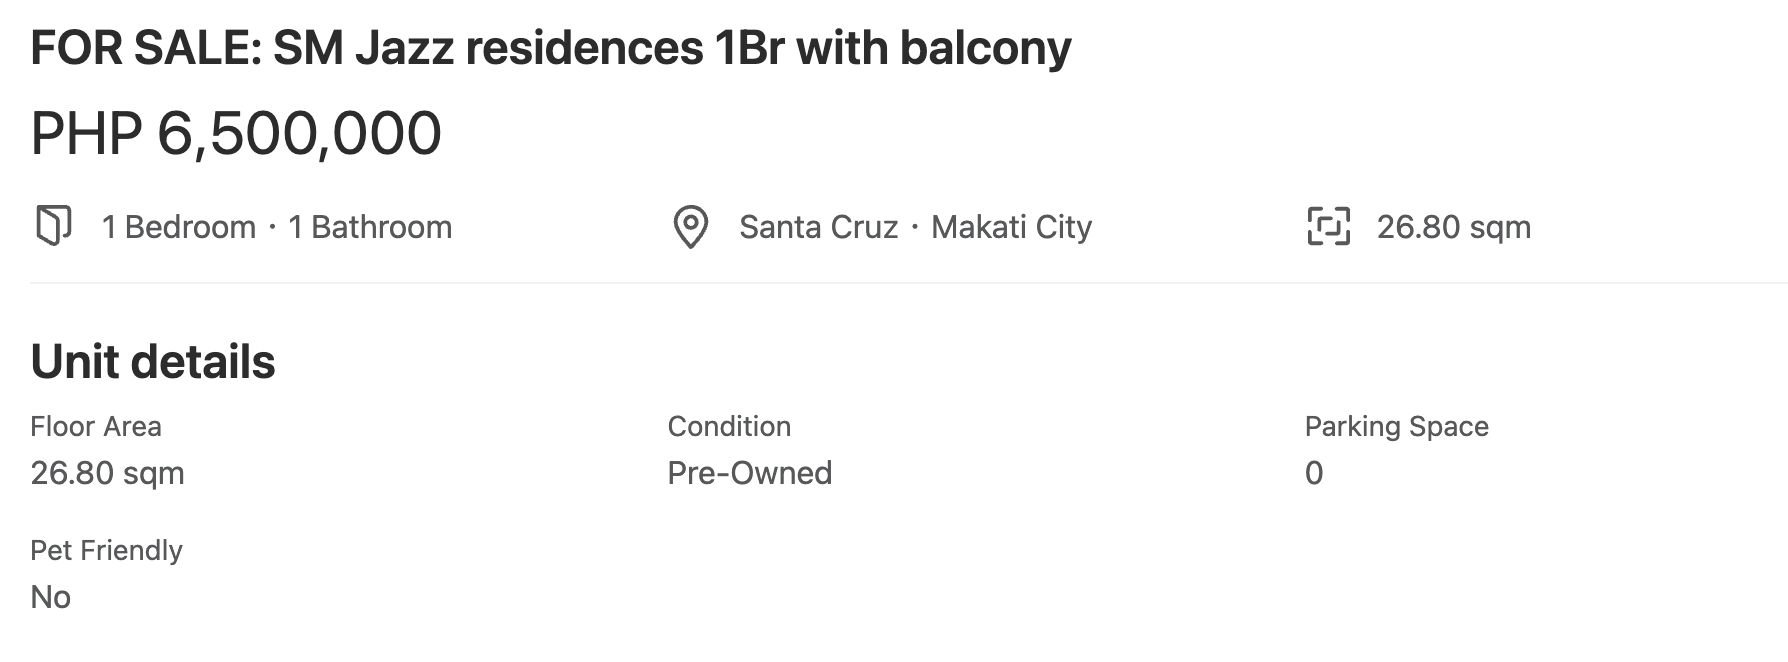

In [95]:
sample_3 = get_features(1, 1, 26.8, 'Santa Cruz', 'Makati City')

In [96]:
get_price(sample_3, best_model)

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count,Price (PHP)
234,14.567865,121.016227,1,1,26.8,23.0,3.0,1.0,1.0,7.0,1.0,4.874986e+06


<div style="background-color:#ce2029 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">STREAMLIT</h1></center>
</div> 

# For Streamlit

In [97]:
df_condo_final = pd.read_csv('cleaned_housing.csv')

In [98]:
df_condo_final

,Latitude,Longitude,Bedrooms,Bath,Floor_area (sqm),brgy_area_sqm,city_pop,Price (PHP),Food_Count,Education_Count,Healthcare_Count,Public_Services_Count,Finance_Count,Transportation_Count
0,14.588716,121.060009,1,1,82.0,8.168471e+05,803159,27448000.0,71.0,4.0,5.0,0.0,63.0,8.0
1,14.588377,121.059897,1,1,70.0,8.168471e+05,803159,26930000.0,71.0,4.0,5.0,0.0,63.0,8.0
2,14.588377,121.059897,1,1,70.0,8.168471e+05,803159,27611000.0,71.0,4.0,5.0,0.0,63.0,8.0
3,14.583771,121.059675,2,2,87.0,8.168471e+05,803159,22595200.0,71.0,4.0,5.0,0.0,63.0,8.0
4,14.588377,121.059897,1,1,74.0,8.168471e+05,803159,26849000.0,71.0,4.0,5.0,0.0,63.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,14.704999,120.985180,2,2,36.0,1.152317e+06,714978,4050000.0,0.0,0.0,0.0,0.0,1.0,0.0
945,14.704999,120.985180,1,1,21.0,1.152317e+06,714978,2050000.0,0.0,0.0,0.0,0.0,1.0,0.0
946,14.704999,120.985180,2,2,36.0,1.152317e+06,714978,4050000.0,0.0,0.0,0.0,0.0,1.0,0.0
947,14.545950,121.049400,1,1,37.0,3.239744e+06,629616,10000000.0,328.0,8.0,11.0,2.0,101.0,12.0


In [99]:
X_final = df_condo_final.drop('Price (PHP)', axis=1)
y_final = df_condo_final['Price (PHP)']
price_bins_final = pd.qcut(df_condo_final['Price (PHP)'], q=3, labels=[
                           'low', 'medium', 'high'])
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final,
                                                                            stratify=price_bins_final, test_size=0.2, random_state=13)

In [100]:
gbr_final = GradientBoostingRegressor(learning_rate=0.2,
                                      n_estimators=400, 
                                      random_state=13)

In [101]:
gbr_final.fit(X_train_final, y_train_final)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=400, random_state=13)

In [102]:
gbr_final.predict(X_test_final)

array([15508344.43915716, 16367209.53657639, 42625320.80142409,
       16367209.53657639, 11096593.0668987 , 16367209.53657639,
        3258068.8653377 , 17756470.00240352, 11756755.7167005 ,
       11756755.7167005 , 40871695.89045698, 52116565.60089019,
        3804390.8968949 , 11745720.15241245, 23722535.44357302,
        6912600.28845193,  8856485.73253367, 11082279.33000967,
        7806618.67158138, 17756470.00240352, 15467853.89434441,
       31827953.97881232,  7806618.67158138, 26171569.90104605,
       32215326.97253406, 26171569.90104605, 16571644.34064913,
       13015893.19873841, 16367209.53657639, 16112597.21641736,
       16367209.53657639, 22157975.95767782, 12105941.86367442,
       15547247.21258841,  7742425.10320512,  3108718.00147427,
       12077842.48936431, 16112597.21641736,  8856485.73253367,
       26171569.90104605, 40501916.53091975,  8856485.73253367,
        2596246.32984208,  8856485.73253367,  3258068.8653377 ,
       16367209.53657639, 52116565.60089

In [103]:
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

In [104]:
# Define dependent variable (y) and independent variables (X)
y = df_condo_agg['Price (PHP)'] #lower case letter for dependent var
X = df_condo_agg.drop('Price (PHP)', axis=1) #Upper case letter for independent var

In [105]:
# Add the constant (alpha) to the regression model
X = sm.add_constant(X)

In [106]:
#Fit the regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

In [107]:
#Print the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Price (PHP)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1094.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:40:01   Log-Likelihood:                -15640.
No. Observations:                 949   AIC:                         3.130e+04
Df Residuals:                     937   BIC:                         3.136e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.795e+

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant (intercept) to the model because VIF calculation expects it
X = add_constant(df_condo_agg)

# Calculate VIF for each explanatory variable
VIF = pd.DataFrame()
VIF["Variable"] = X.drop('Price (PHP)', axis=1).columns
VIF["VIF"] = [variance_inflation_factor(X.drop(
    'Price (PHP)', axis=1).values, i) for i in range(X.drop('Price (PHP)', axis=1).shape[1])]

print(VIF)

                 Variable           VIF
0                   const  1.046394e+08
1                Latitude  1.387361e+00
2               Longitude  3.499586e+00
3                Bedrooms  3.460888e+00
4                    Bath  3.296249e+00
5        Floor_area (sqm)  2.319593e+00
6              Food_Count  4.673226e+00
7         Education_Count  4.127929e+00
8        Healthcare_Count  4.542211e+00
9   Public_Services_Count  3.406371e+00
10          Finance_Count  9.912154e+00
11   Transportation_Count  4.815926e+00
